In [1]:
# --- Pacotes Python que Usamos na Aula ---

import kagglehub
"""
Para que serve: Nos ajuda a baixar conjuntos de dados diretamente do Kaggle.
Analogia: É como uma "chave" que abre a porta para uma biblioteca enorme de dados,
permitindo pegar os arquivos que precisamos diretamente para o Colab.
"""

import pandas as pd
"""
Para que serve: É nosso pacote principal para trabalhar com dados em forma de tabela (DataFrame).
Analogia: É a nossa "ferramenta de trabalho" mais importante. Com ele, a gente consegue ler,
organizar, resumir e manipular os dados de forma eficiente.
"""

import numpy as np
"""
Para que serve: Pacote para fazer cálculos matemáticos de forma muito eficiente.
Analogia: É a "calculadora turbinada" que o Pandas usa nos bastidores para fazer
cálculos complexos e estatísticas de forma rápida.
"""

import math
"""
Para que serve: Nos dá acesso a funções matemáticas mais avançadas.
Analogia: É uma "caixinha de ferramentas de matemática" que usamos para aplicar
fórmulas específicas, como o logaritmo na Regra de Sturges.
"""

'\nPara que serve: Nos dá acesso a funções matemáticas mais avançadas.\nAnalogia: É uma "caixinha de ferramentas de matemática" que usamos para aplicar\nfórmulas específicas, como o logaritmo na Regra de Sturges.\n'

In [3]:
!pip install kagglehub

# 1) Importando Dados

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("imls/museum-directory")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/museum-directory


In [13]:
# Carrega o arquivo CSV em um DataFrame do Pandas
df = pd.read_csv('/kaggle/input/museum-directory/museums.csv', low_memory=False)

In [14]:
# Quais são as colunas desse dataset?
df.columns

Index(['Museum ID', 'Museum Name', 'Legal Name', 'Alternate Name',
       'Museum Type', 'Institution Name',
       'Street Address (Administrative Location)',
       'City (Administrative Location)', 'State (Administrative Location)',
       'Zip Code (Administrative Location)',
       'Street Address (Physical Location)', 'City (Physical Location)',
       'State (Physical Location)', 'Zip Code (Physical Location)',
       'Phone Number', 'Latitude', 'Longitude', 'Locale Code (NCES)',
       'County Code (FIPS)', 'State Code (FIPS)', 'Region Code (AAM)',
       'Employer ID Number', 'Tax Period', 'Income', 'Revenue'],
      dtype='object')

# 2) Vamos classificar os tipos de dados das colunas?

## 2.1) Usando o comando .info()



Pense no comando `.info()` do pandas como um **"check-up rápido"** ou um **"raio-X"** do seu conjunto de dados (seu DataFrame).

Quando você o executa, é como se estivesse pedindo ao pandas para te dar um resumo completo e amigável de tudo que está dentro do seu DataFrame.

**O que o `.info()` te mostra?**

Ele te dá as seguintes informações essenciais, de uma forma fácil de ler:

1.  **O tamanho do seu dataset:** Quantas linhas (entradas) e quantas colunas ele tem.
2.  **Os nomes das colunas:** Uma lista de todas as colunas existentes.
3.  **A saúde dos seus dados:** Ele te diz quantos valores **não nulos** (que não estão faltando) existem em cada coluna. Isso é super útil para identificar rapidamente onde você tem dados ausentes.
4.  **O tipo de dado:** Ele informa o tipo de dado que cada coluna contém (ex: `int64` para números inteiros, `float64` para números com casas decimais, `object` para texto). Isso é fundamental para saber se você pode fazer cálculos com uma coluna ou se precisa tratá-la antes.
5.  **O consumo de memória:** Ele te diz quanta memória o seu DataFrame está consumindo.

**Exemplo de uso no Colab**

Suponha que você tenha carregado um conjunto de dados em um DataFrame chamado `df`. Você simplesmente faria:

```python
import pandas as pd

# Supondo que 'df' é o seu DataFrame
df.info()
```

**Em resumo...**

O `.info()` é a **primeira coisa que você deve rodar** ao carregar um novo dataset. Ele te dá um panorama geral e te ajuda a encontrar problemas logo de cara, como dados faltando ou colunas com o tipo de dado errado, antes de você começar a análise. É um comando simples que economiza muito tempo e evita dores de cabeça\!

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33072 entries, 0 to 33071
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Museum ID                                 33072 non-null  int64  
 1   Museum Name                               33072 non-null  object 
 2   Legal Name                                33072 non-null  object 
 3   Alternate Name                            1927 non-null   object 
 4   Museum Type                               33072 non-null  object 
 5   Institution Name                          2749 non-null   object 
 6   Street Address (Administrative Location)  33062 non-null  object 
 7   City (Administrative Location)            33072 non-null  object 
 8   State (Administrative Location)           33072 non-null  object 
 9   Zip Code (Administrative Location)        33072 non-null  object 
 10  Street Address (Physical Location)

## 2.2) Usando o comando .columns()

Pense no comando `.columns` como uma forma de perguntar ao seu DataFrame: **"Quais são os títulos de todas as minhas colunas?"**

Ele simplesmente te retorna uma lista com os nomes de todas as colunas do seu DataFrame. É uma maneira rápida e direta de saber exatamente o que você tem no seu conjunto de dados.

**Exemplo:**

```python
# O comando
df.columns

# Saída (exemplo)
Index(['Museum Name', 'Museum Type', 'City', 'Revenue'], dtype='object')
```

In [16]:
df.columns

Index(['Museum ID', 'Museum Name', 'Legal Name', 'Alternate Name',
       'Museum Type', 'Institution Name',
       'Street Address (Administrative Location)',
       'City (Administrative Location)', 'State (Administrative Location)',
       'Zip Code (Administrative Location)',
       'Street Address (Physical Location)', 'City (Physical Location)',
       'State (Physical Location)', 'Zip Code (Physical Location)',
       'Phone Number', 'Latitude', 'Longitude', 'Locale Code (NCES)',
       'County Code (FIPS)', 'State Code (FIPS)', 'Region Code (AAM)',
       'Employer ID Number', 'Tax Period', 'Income', 'Revenue'],
      dtype='object')

## 2.3) Usando o comando .unique()

Pense no `.unique()` como uma forma de perguntar ao seu conjunto de dados: **"Quais são todos os valores diferentes nesta coluna, sem repetição?"**

Quando você aplica `.unique()` em uma coluna específica, o pandas vasculha aquela coluna inteira e te devolve uma lista de todos os valores únicos que ele encontrou, removendo qualquer duplicata.

**Como funciona?**

O comando `df['City (Physical Location)'].unique()` faz exatamente isso:

* Ele seleciona a coluna `'City (Physical Location)'`.
* Em seguida, ele aplica o `.unique()` para encontrar todas as cidades diferentes que aparecem na lista.

O resultado será uma lista como `['New York', 'Washington', 'Chicago', 'Boston', ...]`, mostrando todas as cidades onde há um museu no seu dataset, sem repetir os nomes.

**Para que ele serve?**

É super útil para:

* **Explorar dados categóricos:** Para saber quais são todas as categorias possíveis em uma coluna.
* **Identificar erros:** Para encontrar inconsistências ou erros de digitação (ex: `'New York'` e `'New York '` com um espaço a mais).
* **Planejar sua análise:** Para ter uma visão geral da variedade de dados antes de começar a trabalhar neles.

In [18]:
# Vamos explorar algumas delas?
## altere o nome da coluna nas linhas abaixo
df['Museum Name'].unique()

array(['ALASKA AVIATION HERITAGE MUSEUM', 'ALASKA BOTANICAL GARDEN',
       'ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TECHNOLOGY', ...,
       'WYOMING TERRITORIAL PARK HISTORIC ASSOCIATION',
       'WYOMING TRANSPORTATION MUSEUM', 'YELLOWSTONE NATIONAL PARK'],
      dtype=object)

## 2.4) Classificação das Colunas do Dataset de Museus

| Nome da Coluna                             | Descrição Básica                               | Tipo de Dados     | Subtipo    | Justificativa                                                            |
| :----------------------------------------- | :--------------------------------------------- | :---------------- | :--------- | :----------------------------------------------------------------------- |
| `Museum ID`                                | Identificador único de cada museu.             | Qualitativa       | Nominal    | Identificador único, sem valor numérico significativo.                   |
| `Museum Name`                              | Nome oficial do museu.                         | Qualitativa       | Nominal    | Nome do museu, usado como rótulo ou categoria.                           |
| `Legal Name`                               | Nome legal da entidade que opera o museu.      | Qualitativa       | Nominal    | Nome legal do museu, sem ordem.                                          |
| `Alternate Name`                           | Nomes alternativos ou apelidos do museu.       | Qualitativa       | Nominal    | Nome alternativo do museu, sem ordem.                                    |
| `Museum Type`                              | Categoria principal do museu (ex: Arte, Ciência). | Qualitativa       | Nominal    | Categoria que descreve o tipo de museu (ex: arte, história).             |
| `Institution Name`                         | Nome da instituição-mãe (ex: Universidade).    | Qualitativa       | Nominal    | Nome da instituição a que o museu pertence.                              |
| `Street Address (Administrative Location)` | Endereço administrativo do museu.              | Qualitativa       | Nominal    | Endereço textual, sem ordem.                                             |
| `City (Administrative Location)`           | Cidade do endereço administrativo.             | Qualitativa       | Nominal    | Nome da cidade, sem ordem.                                               |
| `State (Administrative Location)`          | Estado do endereço administrativo.             | Qualitativa       | Nominal    | Sigla do estado, sem ordem.                                              |
| `Zip Code (Administrative Location)`       | CEP do endereço administrativo.                | Qualitativa       | Nominal    | Código numérico que representa uma área geográfica.                      |
| `Street Address (Physical Location)`       | Endereço físico onde o museu está localizado.  | Qualitativa       | Nominal    | Endereço físico, sem ordem.                                              |
| `City (Physical Location)`                 | Cidade do endereço físico.                     | Qualitativa       | Nominal    | Nome da cidade, sem ordem.                                               |
| `State (Physical Location)`                | Estado do endereço físico.                     | Qualitativa       | Nominal    | Sigla do estado, sem ordem.                                              |
| `Zip Code (Physical Location)`             | CEP do endereço físico.                        | Qualitativa       | Nominal    | Código numérico que representa uma área geográfica.                      |
| `Phone Number`                             | Número de telefone do museu.                   | Qualitativa       | Nominal    | Número de telefone, usado como identificador.                            |
| `Latitude`                                 | Coordenada de latitude da localização.         | Quantitativa      | Contínua   | Medida que pode assumir qualquer valor dentro de um intervalo.           |
| `Longitude`                                | Coordenada de longitude da localização.        | Quantitativa      | Contínua   | Medida que pode assumir qualquer valor dentro de um intervalo.           |
| `Locale Code (NCES)`                       | Código de localidade do National Center for Education Statistics. | Qualitativa | Nominal | Código de identificação de local, sem ordem.                             |
| `County Code (FIPS)`                       | Código de condado do Federal Information Processing Standards. | Qualitativa | Nominal | Código de identificação de condado, sem ordem.                           |
| `State Code (FIPS)`                        | Código de estado do Federal Information Processing Standards. | Qualitativa | Nominal | Código de identificação de estado, sem ordem.                            |
| `Region Code (AAM)`                        | Código de região da American Alliance of Museums. | Qualitativa | Nominal | Código de identificação de região, sem ordem.                            |
| `Employer ID Number`                       | Número de identificação do empregador.         | Qualitativa       | Nominal    | Identificador numérico de empregador, sem valor quantitativo.            |
| `Tax Period`                               | Período de apuração de impostos (ex: ano fiscal). | Qualitativa       | Nominal | Rótulo para o período de arrecadação de impostos.                        |
| `Income`                                   | Receita total do museu em um período.          | Quantitativa      | Contínua   | Valor monetário que pode assumir qualquer valor em uma faixa.            |
| `Revenue`                                  | Receita total do museu em um período.          | Quantitativa      | Contínua   | Valor monetário que pode assumir qualquer valor em uma faixa.            |

# 3) Organização dos Dados para Colunas Categóricas ou Qualitativas!

## 3.1) Dados Brutos

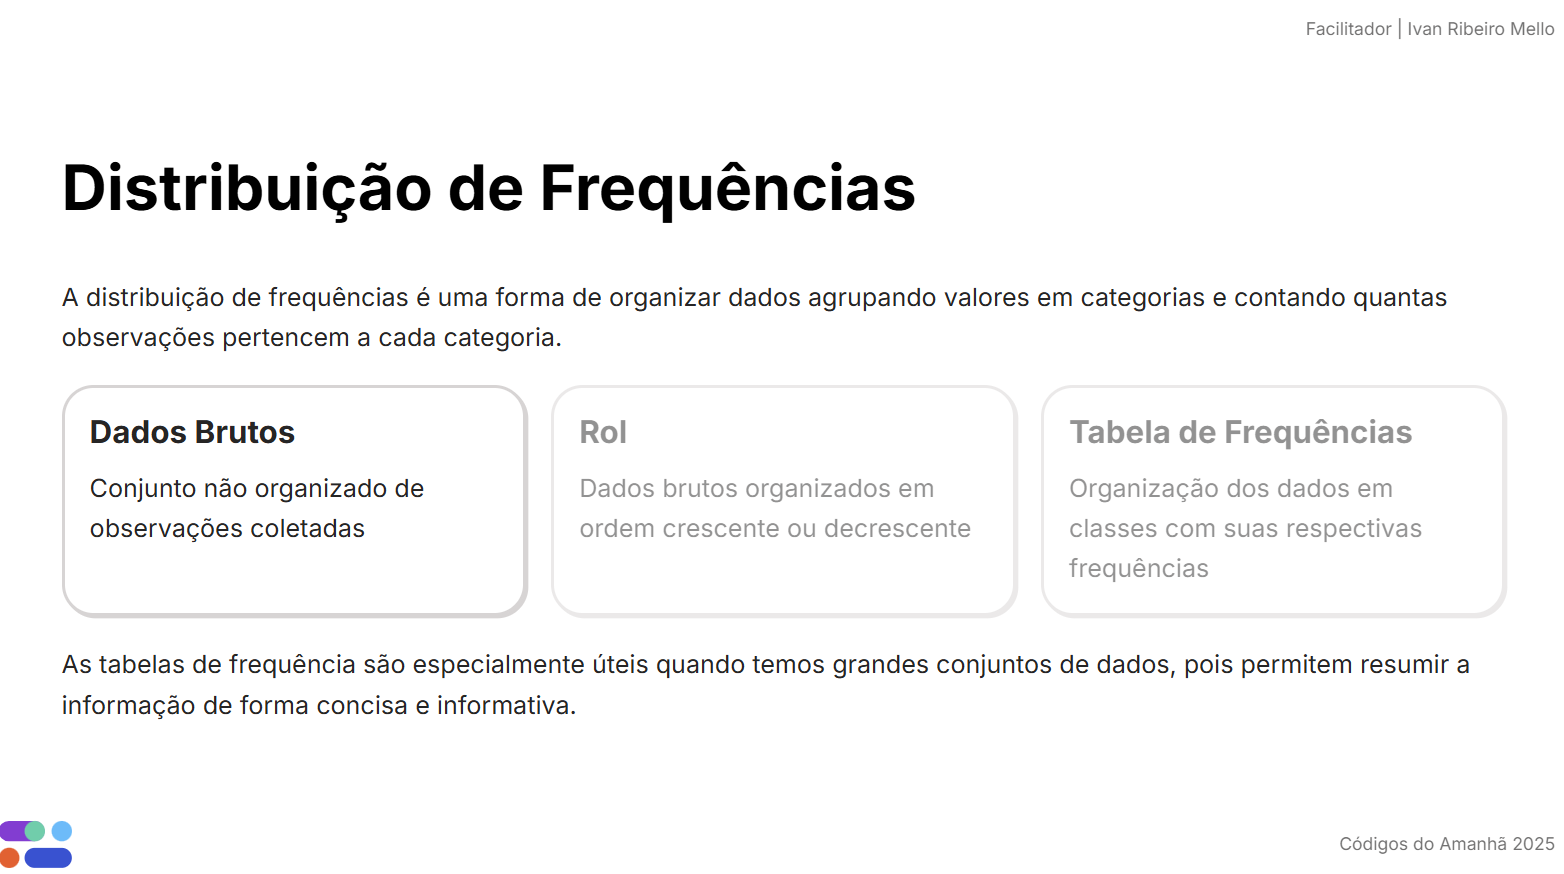

In [20]:
# Quando fazemos apenas um df.head() é fácil perceber que as 25 colunas do nosso dataset estão embaralhadas
df.head()

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
0,8400200098,ALASKA AVIATION HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,4721 AIRCRAFT DR,ANCHORAGE,AK,99502,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0
1,8400200117,ALASKA BOTANICAL GARDEN,ALASKA BOTANICAL GARDEN INC,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",NaN,4601 CAMPBELL AIRSTRIP RD,ANCHORAGE,AK,99507,...,61.16890,-149.76708,4.0,20.0,2.0,6,920115504,201312.0,1379576.0,1323742.0
2,8400200153,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,ALASKA CHALLENGER CENTER FOR SPACE SCIENCE TEC...,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,NaN,9711 KENAI SPUR HWY,KENAI,AK,99611,...,60.56149,-151.21598,3.0,122.0,2.0,6,921761906,201312.0,740030.0,729080.0
3,8400200143,ALASKA EDUCATORS HISTORICAL SOCIETY,ALASKA EDUCATORS HISTORICAL SOCIETY,NaN,HISTORIC PRESERVATION,NaN,214 BIRCH STREET,KENAI,AK,99611,...,60.56280,-151.26597,3.0,122.0,2.0,6,920165178,201412.0,0.0,0.0
4,8400200027,ALASKA HERITAGE MUSEUM,ALASKA AVIATION HERITAGE MUSEUM,NaN,HISTORY MUSEUM,NaN,301 W NORTHERN LIGHTS BLVD,ANCHORAGE,AK,99503,...,61.17925,-149.97254,1.0,20.0,2.0,6,920071852,201312.0,602912.0,550236.0


In [ ]:
# Agora, se fizermos uma subseleção, por exemplo, apenas da coluna do tipo do museu conseguimos ver que ainda dá pra
## organizar melhor
df[['Museum Type']]

,Museum Type
0,HISTORY MUSEUM
1,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER"
2,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM
3,HISTORIC PRESERVATION
4,HISTORY MUSEUM
...,...
33067,HISTORIC PRESERVATION
33068,GENERAL MUSEUM
33069,HISTORIC PRESERVATION
33070,HISTORY MUSEUM


## 3.2) Rol

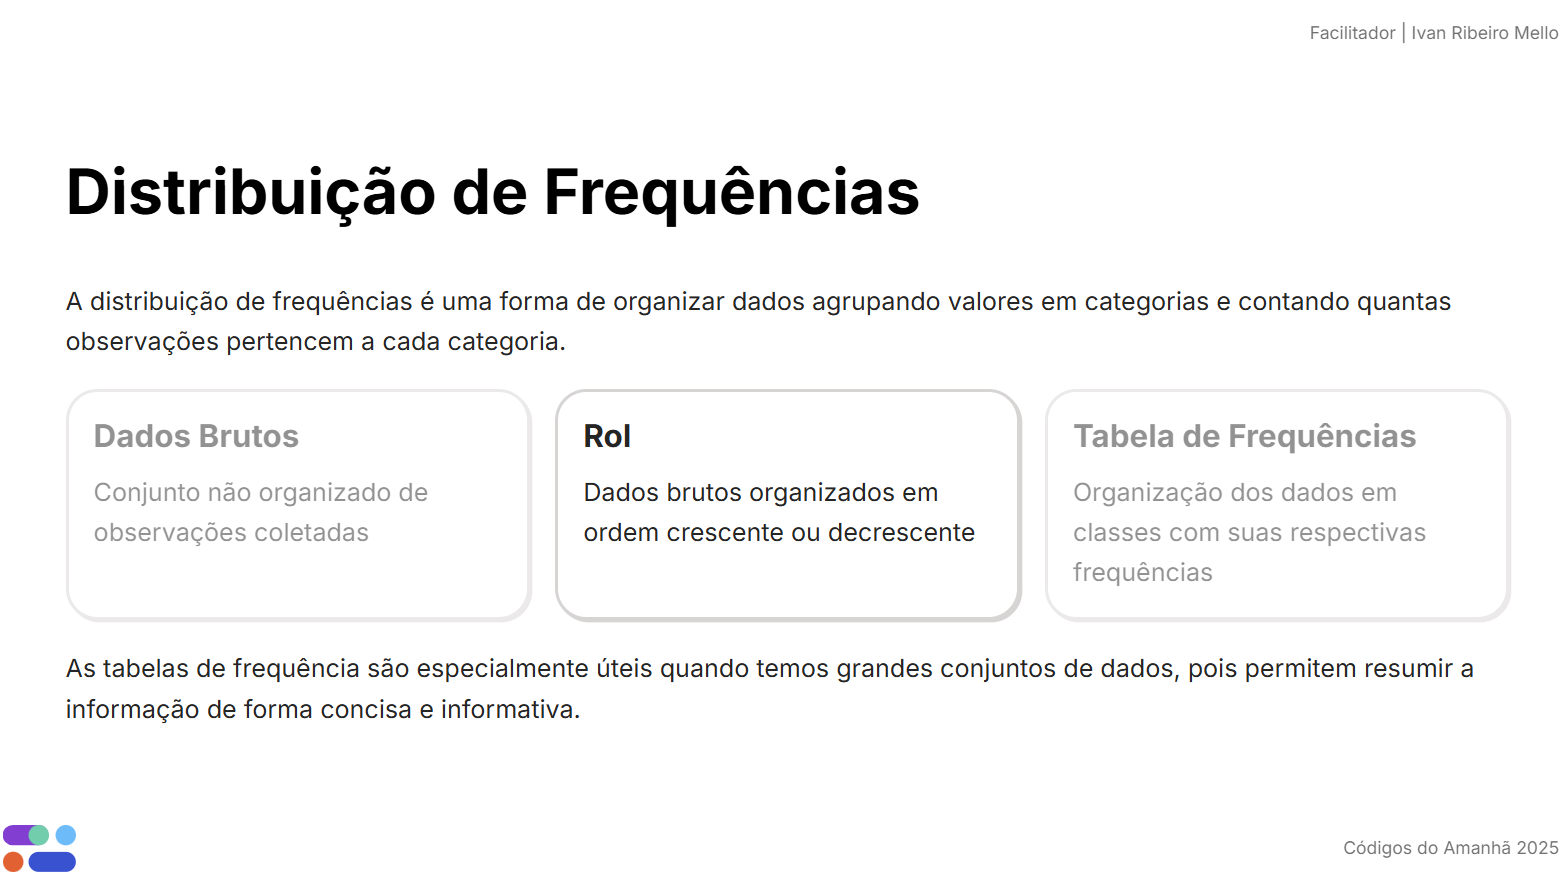

In [ ]:
# Se usarmos o comando .unique, conseguimos obter o rol dessa coluna!
df['Museum Type'].unique()

array(['HISTORY MUSEUM', 'ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER',
       'SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM',
       'HISTORIC PRESERVATION', 'GENERAL MUSEUM',
       'ZOO, AQUARIUM, OR WILDLIFE CONSERVATION', 'ART MUSEUM',
       "CHILDREN'S MUSEUM", 'NATURAL HISTORY MUSEUM'], dtype=object)

## 3.3) Tabela de Frequências

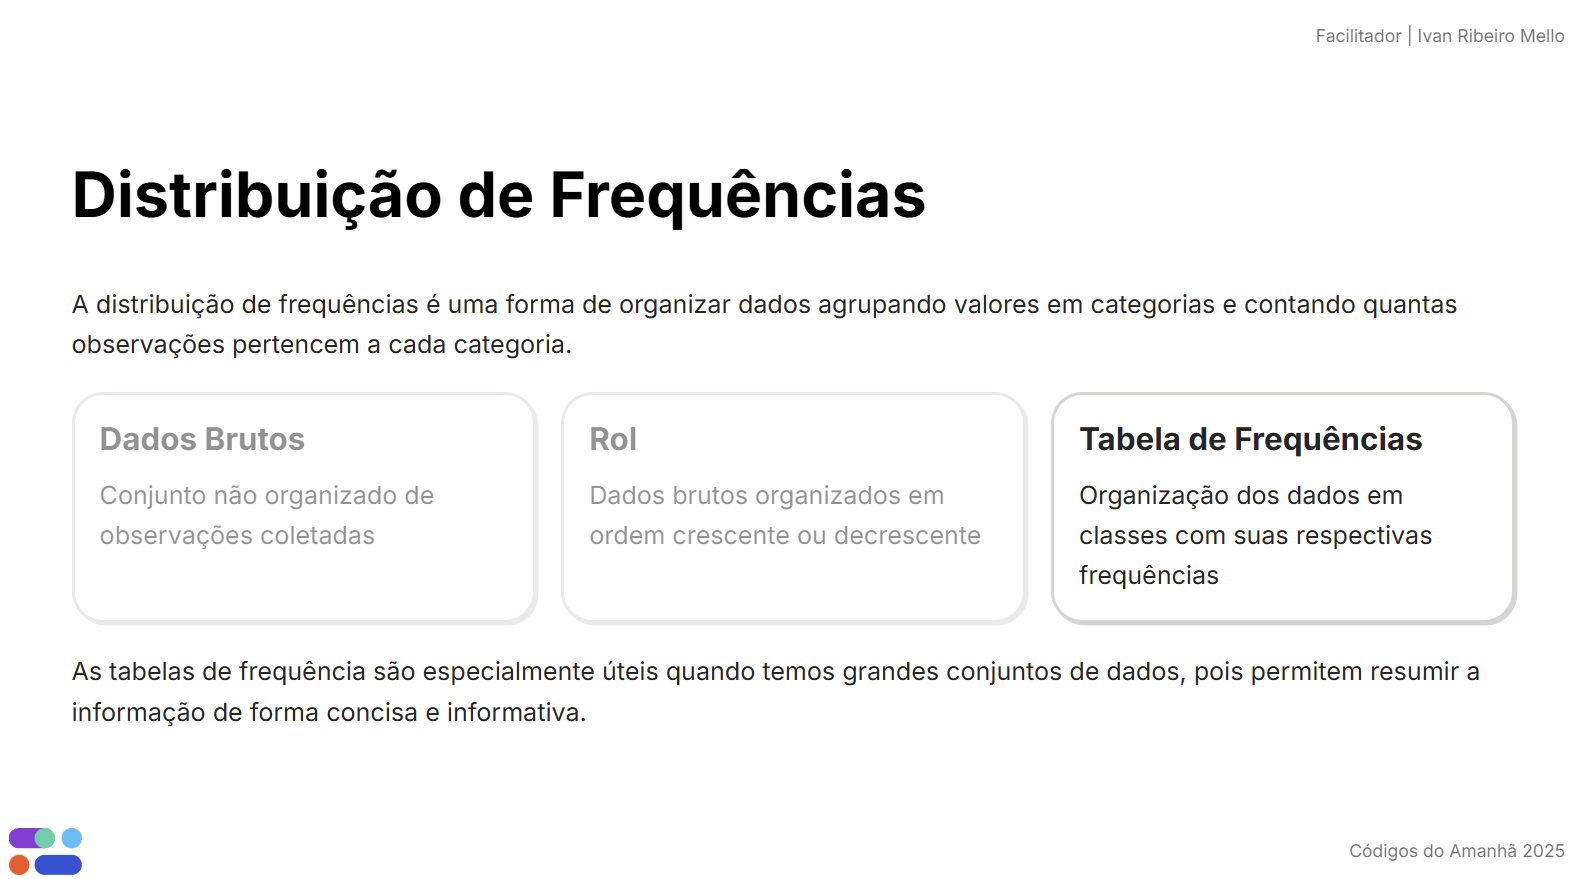

In [22]:
# Mas olha que legal quando usamos .value_counts() a gente consegue obter a Tabela de Frequências dessa coluna!
df['Museum Type'].value_counts()

,count
Museum Type,
HISTORIC PRESERVATION,14861
GENERAL MUSEUM,8699
ART MUSEUM,3241
HISTORY MUSEUM,2284
"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",1484
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,1081
"ZOO, AQUARIUM, OR WILDLIFE CONSERVATION",564
CHILDREN'S MUSEUM,512
NATURAL HISTORY MUSEUM,346


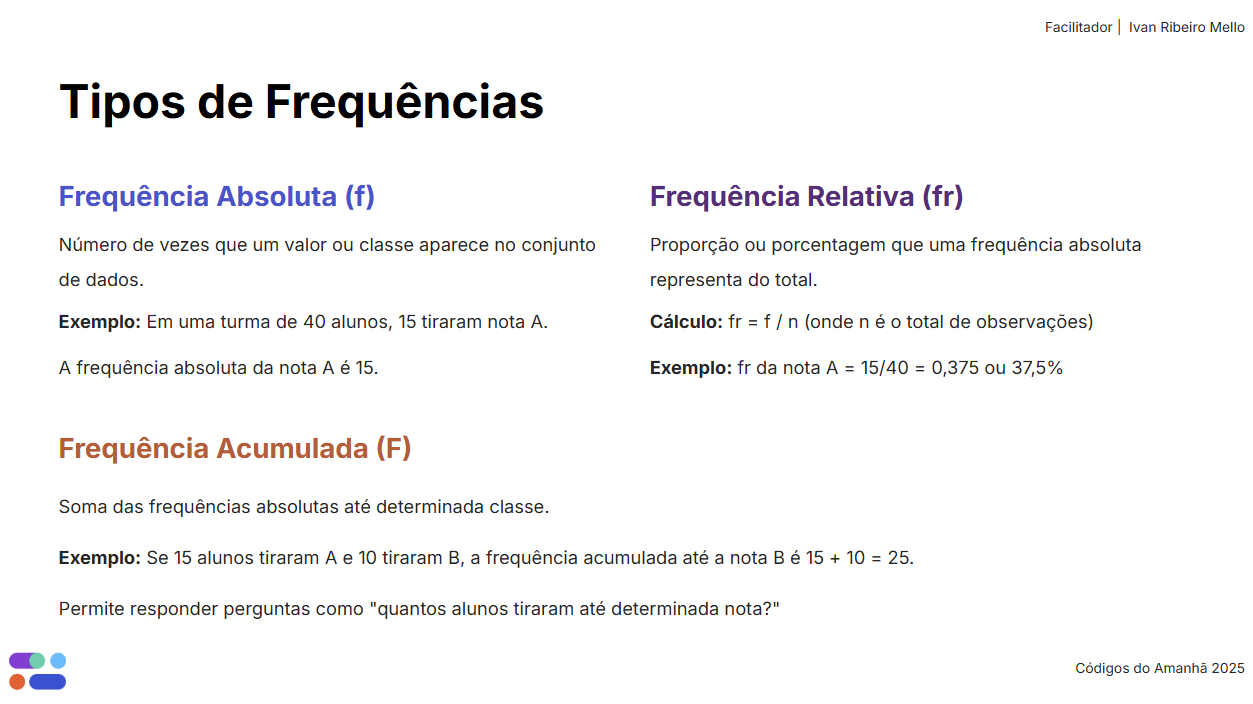

In [ ]:
# Passo 1: Frequência Absoluta (f)
# A partir do comando .value_counts(), criamos o DataFrame inicial.
# --------------------------------------------------------------------
df_frequencia_tipo = df['Museum Type'].value_counts().to_frame('Freq. Absoluta (f)')

In [ ]:
# --- Passo 2: Frequência Relativa (fr) ---
# A frequência relativa é a frequência absoluta dividida pelo total, em percentual.
df_frequencia_tipo['Freq. Relativa (fr)'] = (
    df_frequencia_tipo['Freq. Absoluta (f)'] / df_frequencia_tipo['Freq. Absoluta (f)'].sum()
) * 100

In [ ]:
# --- Passo 3: Frequência Absoluta Acumulada (F) ---
# Usamos .cumsum() na frequência absoluta.
df_frequencia_tipo['Freq. Abs. Acumulada (F)'] = df_frequencia_tipo['Freq. Absoluta (f)'].cumsum()

In [ ]:
# --- Passo 4: Frequência Relativa Acumulada (Fr) ---
# Usamos .cumsum() na frequência relativa.
df_frequencia_tipo['Freq. Rel. Acumulada (Fr)'] = df_frequencia_tipo['Freq. Relativa (fr)'].cumsum()

In [ ]:
df_frequencia_tipo

,Freq. Absoluta (f),Freq. Relativa (fr),Freq. Abs. Acumulada (F),Freq. Rel. Acumulada (Fr)
Museum Type,,,,
HISTORIC PRESERVATION,14861,44.94,14861,44.94
GENERAL MUSEUM,8699,26.30,23560,71.24
ART MUSEUM,3241,9.80,26801,81.04
HISTORY MUSEUM,2284,6.91,29085,87.94
"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",1484,4.49,30569,92.43
SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,1081,3.27,31650,95.70
"ZOO, AQUARIUM, OR WILDLIFE CONSERVATION",564,1.71,32214,97.41
CHILDREN'S MUSEUM,512,1.55,32726,98.95
NATURAL HISTORY MUSEUM,346,1.05,33072,100.00


# 4) Organização dos Dados para Colunas Quantitativas!

## 4.1) Dados Brutos

In [ ]:
# novamente, vamos ver como os dados estão desorganizados
df[['Revenue']].head()

,Revenue
0,550236.0
1,1323742.0
2,729080.0
3,0.0
4,550236.0


## 4.2) Rol

Pense no `.describe()` como o **"resumo executivo"** do seu conjunto de dados.

Em uma única linha de código, ele te entrega uma ficha técnica completa de todas as colunas numéricas, mostrando as estatísticas mais importantes de uma vez só:

* **count:** Quantidade de valores válidos.
* **mean:** A média dos valores.
* **std:** O desvio padrão (o quão espalhados os dados estão).
* **min** e **max:** O menor e o maior valor.
* **25%, 50%, 75%:** Os quartis, que ajudam a entender a distribuição dos dados (o 50% é a mediana).

É o comando ideal para ter uma visão geral e rápida das suas colunas quantitativas.

In [ ]:
df['Revenue'].describe()

,Revenue
count,2.229000e+04
mean,2.097605e+07
std,2.485197e+08
min,-2.127393e+06
25%,0.000000e+00
50%,3.307000e+03
75%,1.676960e+05
max,5.840349e+09


In [ ]:
# Ajustando as configurações do Python para não mostrar mais números grandes em notação científica
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df['Revenue'].describe()

,Revenue
count,22290.00
mean,20976047.06
std,248519659.16
min,-2127393.00
25%,0.00
50%,3307.00
75%,167696.00
max,5840349457.00


In [ ]:
# colocando separador de milhares também
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df['Revenue'].describe()

,Revenue
count,"22,290.00"
mean,"20,976,047.06"
std,"248,519,659.16"
min,"-2,127,393.00"
25%,0.00
50%,"3,307.00"
75%,"167,696.00"
max,"5,840,349,457.00"


In [ ]:
# deu uma curiosidade pra saber qual é o museu com essa receita máxima né?
df.query('Revenue==5840349457.00')

,Museum ID,Museum Name,Legal Name,Alternate Name,Museum Type,Institution Name,Street Address (Administrative Location),City (Administrative Location),State (Administrative Location),Zip Code (Administrative Location),...,Latitude,Longitude,Locale Code (NCES),County Code (FIPS),State Code (FIPS),Region Code (AAM),Employer ID Number,Tax Period,Income,Revenue
1090,8409500460,FRED LAWRENCE WHIPPLE OBSERVATORY,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,SCIENCE & TECHNOLOGY MUSEUM OR PLANETARIUM,HARVARD UNIVERSITY,670 MT HOPKINS RD,AMADO,AZ,2138,...,42.37,-71.11,1.00,17.00,25.00,1,42103580,"201,306.00","83,181,439,574.00","5,840,349,457.00"
11883,8409501948,ARNOLD ARBORETUM OF HARVARD UNIVERSITY JAMAICA...,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,"ARBORETUM, BOTANICAL GARDEN, OR NATURE CENTER",HARVARD UNIVERSITY,125 ARBORWAY,CAMBRIDGE,MA,2130,...,42.37,-71.11,1.00,17.00,25.00,1,42103580,"201,306.00","83,181,439,574.00","5,840,349,457.00"
11903,8409501334,AUTHUR M. SACKLER MUSEUM,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,GENERAL MUSEUM,HARVARD UNIVERSITY,32 QUINCY STREET,CAMBRIDGE,MA,2138,...,42.37,-71.11,1.00,17.00,25.00,1,42103580,"201,306.00","83,181,439,574.00","5,840,349,457.00"
11989,8409501362,BUSCH-REISINGER MUSEUM,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,GENERAL MUSEUM,HARVARD UNIVERSITY,32 QUINCY STREET,CAMBRIDGE,MA,2138,...,42.37,-71.11,1.00,17.00,25.00,1,42103580,"201,306.00","83,181,439,574.00","5,840,349,457.00"
12021,8409503199,CENTER FOR CONSERVATION AND TECHNICAL STUDIES,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,ART MUSEUM,HARVARD UNIVERSITY,32 QUINCY STREET,CAMBRIDGE,MA,2138,...,42.37,-71.11,1.00,17.00,25.00,1,42103580,"201,306.00","83,181,439,574.00","5,840,349,457.00"
12064,8409501386,COLLECTION OF SCIENTIFIC INSTRUMENTS,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,GENERAL MUSEUM,HARVARD UNIVERSITY,1 OXFORD STREET,CAMBRIDGE,MA,2138,...,42.37,-71.11,1.00,17.00,25.00,1,42103580,"201,306.00","83,181,439,574.00","5,840,349,457.00"
12148,8409501444,FISHER MUSEUM,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,GENERAL MUSEUM,HARVARD UNIVERSITY,324 NORTH MAIN STREET,PETERSHAM,MA,1366,...,42.37,-71.11,1.00,17.00,25.00,1,42103580,"201,306.00","83,181,439,574.00","5,840,349,457.00"
12151,8409503198,FOGG ART MUSEUM,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,ART MUSEUM,HARVARD UNIVERSITY,32 QUINCY STREET,CAMBRIDGE,MA,2138,...,42.37,-71.11,2.00,17.00,25.00,1,42103580,"201,306.00","83,181,439,574.00","5,840,349,457.00"
12179,8409501261,GENERAL ARTEMAS WARD HOUSE,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,HISTORIC PRESERVATION,HARVARD UNIVERSITY,786 MAIN STREET,SHREWSBURY,MA,1545,...,42.37,-71.11,1.00,17.00,25.00,1,42103580,"201,306.00","83,181,439,574.00","5,840,349,457.00"
12221,8409501506,HARVARD FOREST,PRESIDENT AND FELLOWS OF HARVARD COLLEGE,NaN,GENERAL MUSEUM,HARVARD UNIVERSITY,324 NORTH MAIN STREET,PETERSHAM,MA,1366,...,42.37,-71.11,1.00,17.00,25.00,1,42103580,"201,306.00","83,181,439,574.00","5,840,349,457.00"


In [ ]:
# porém, nas nossas discussões vimos que um Rol é uma organização crescente ou decrescente de dados, vamos fazer isso!
df['Revenue'].sort_values(ascending=False) ## experimente trocar para True e False no parâmetro ascending! :)

,Revenue
12227,"5,840,349,457.00"
12228,"5,840,349,457.00"
12229,"5,840,349,457.00"
12230,"5,840,349,457.00"
12231,"5,840,349,457.00"
...,...
33062,NaN
33064,NaN
33065,NaN
33066,NaN


## 4.3) Tabela de Frequências

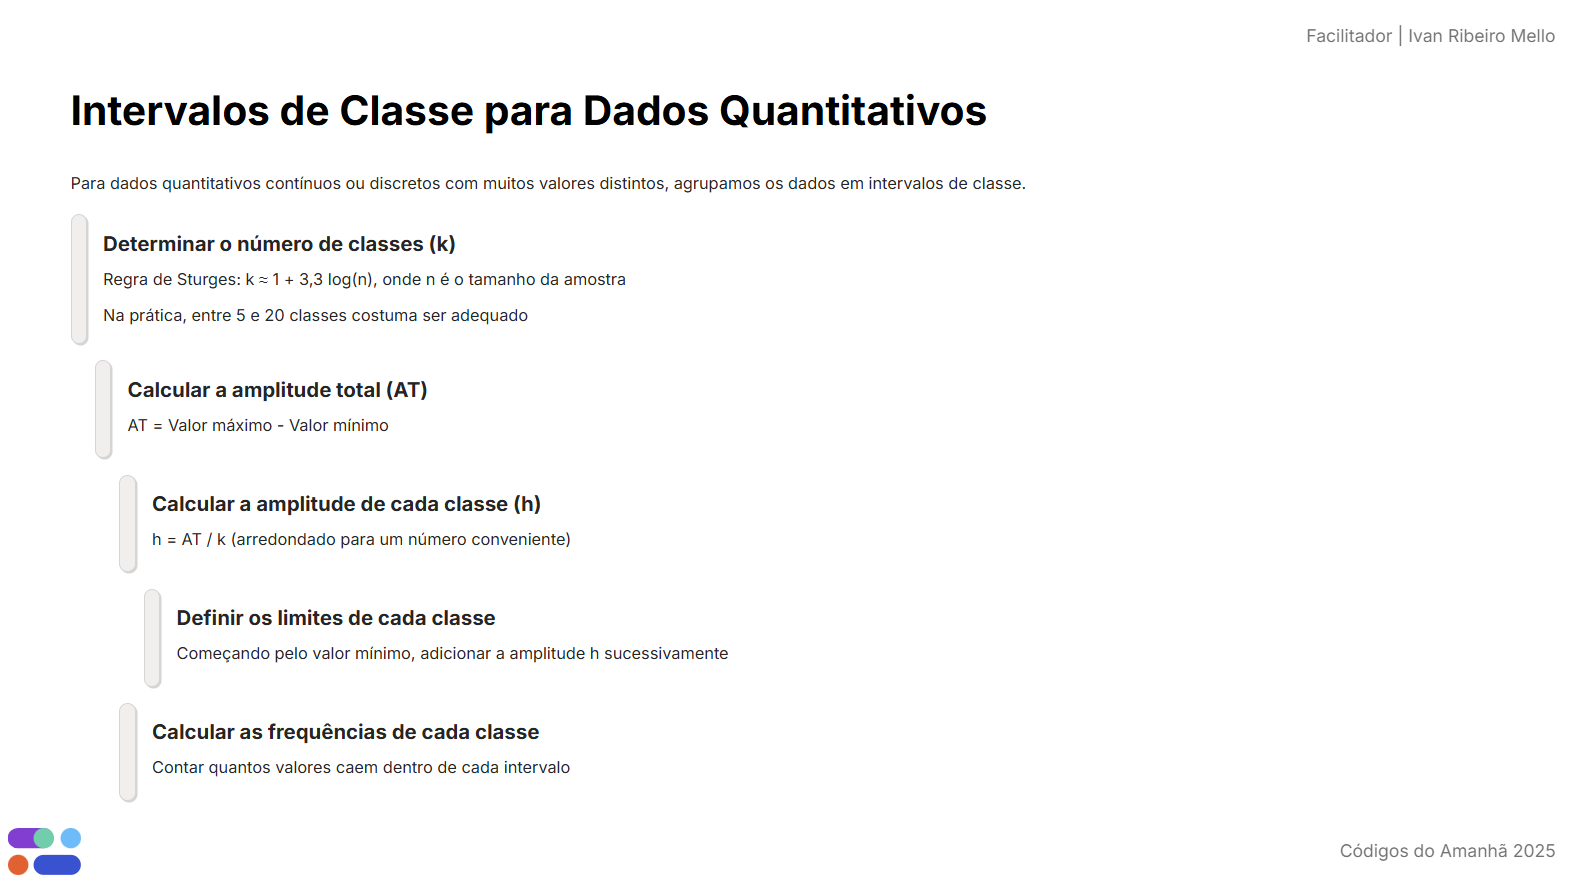

In [ ]:
# Vamos implementar a regra de Sturges que vimos!
df[['Revenue']].shape

(33072, 1)

In [ ]:
# 1. Determinar o número de classes (k) pela Regra de Sturges
## primeiro precisamos pegar o tamanho da amostra
n = df[['Revenue']].shape[0]
## depois calcular o número de classes
k = int(1 + 3.322 * np.log10(n))
print(f"Número de classes (k) pela Regra de Sturges: {k}")

Número de classes (k) pela Regra de Sturges: 16


In [ ]:
# 2. Calcular a amplitude total (AT)
AT = df['Revenue'].max() - df['Revenue'].min()
print(f"Amplitude Total (AT): {AT}")

Amplitude Total (AT): 5842476850.0


In [ ]:
# 3. Calcular a amplitude de cada classe (h)
h = np.ceil(AT / k) # np.ceil arredonda para cima, garantindo que o valor máximo seja incluído
print(f"Amplitude de cada classe (h): {h}")

Amplitude de cada classe (h): 365154804.0


In [ ]:
# 4. Definir os limites de cada classe
# Usamos np.arange para criar as faixas de forma precisa
bins = np.arange(df['Revenue'].min(), df['Revenue'].max() + h, h)

In [ ]:
# 5. Calcular as frequências de cada classe
faixas_de_receita = pd.cut(df['Revenue'], bins=bins, include_lowest=True, right=False)

# Percorremos cada intervalo e criamos uma string formatada para exibir milhares corretamente
rotulos_formatados = [
    f'[{intervalo.left:,.2f} a {intervalo.right:,.2f})'
    for intervalo in faixas_de_receita.cat.categories
]

# 6. Calcular as frequências usando os rótulos formatados
tabela_de_frequencia_receita = faixas_de_receita.value_counts().sort_index()

In [ ]:
# 7. Adicionar o índice formatado à tabela
tabela_de_frequencia_receita.index = rotulos_formatados

In [ ]:
tabela_de_frequencia_receita

,count
"[-2,127,393.00 a 363,027,411.00)",22101
"[363,027,411.00 a 728,182,215.00)",69
"[728,182,215.00 a 1,093,337,019.00)",39
"[1,093,337,019.00 a 1,458,491,823.00)",19
"[1,458,491,823.00 a 1,823,646,627.00)",2
"[1,823,646,627.00 a 2,188,801,431.00)",1
"[2,188,801,431.00 a 2,553,956,235.00)",0
"[2,553,956,235.00 a 2,919,111,039.00)",3
"[2,919,111,039.00 a 3,284,265,843.00)",9
"[3,284,265,843.00 a 3,649,420,647.00)",5


In [ ]:
type(tabela_de_frequencia_receita)

pandas.core.series.Series

Ainda é uma série de dados ou seja, pandas.series. Precisamos transformar em tabela, ou seja, dataframe.

In [ ]:
df_frequencia = tabela_de_frequencia_receita.to_frame('Freq. Absoluta (f)')

In [ ]:
df_frequencia

,Freq. Absoluta (f)
"[-2,127,393.00 a 363,027,411.00)",22101
"[363,027,411.00 a 728,182,215.00)",69
"[728,182,215.00 a 1,093,337,019.00)",39
"[1,093,337,019.00 a 1,458,491,823.00)",19
"[1,458,491,823.00 a 1,823,646,627.00)",2
"[1,823,646,627.00 a 2,188,801,431.00)",1
"[2,188,801,431.00 a 2,553,956,235.00)",0
"[2,553,956,235.00 a 2,919,111,039.00)",3
"[2,919,111,039.00 a 3,284,265,843.00)",9
"[3,284,265,843.00 a 3,649,420,647.00)",5


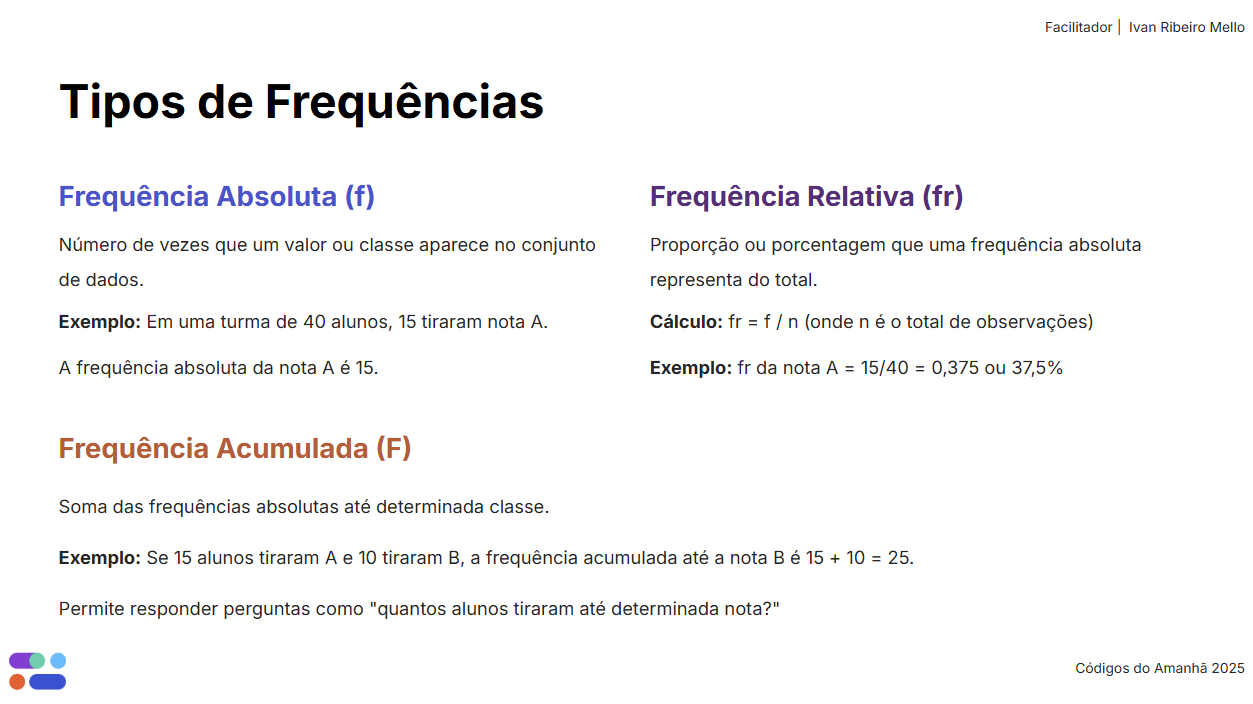

In [ ]:
# --- Frequência Relativa (fr) ---
# A frequência relativa é a frequência absoluta dividida pelo total
# de observações, multiplicado por 100 para ser em percentual.
df_frequencia['Freq. Relativa (fr)'] = (
    df_frequencia['Freq. Absoluta (f)'] / df_frequencia['Freq. Absoluta (f)'].sum()
) * 100

# --- Frequência Absoluta Acumulada (F) ---
# A frequência absoluta acumulada é a soma acumulada da coluna de frequência absoluta.
# O comando .cumsum() faz isso de forma automática.
df_frequencia['Freq. Abs. Acumulada (F)'] = df_frequencia['Freq. Absoluta (f)'].cumsum()

# --- Frequência Relativa Acumulada (Fr) ---
# A frequência relativa acumulada é a soma acumulada da coluna de frequência relativa.
# Também usamos o .cumsum() aqui.
df_frequencia['Freq. Rel. Acumulada (Fr)'] = df_frequencia['Freq. Relativa (fr)'].cumsum()

In [ ]:
df_frequencia

,Freq. Absoluta (f),Freq. Relativa (fr),Freq. Abs. Acumulada (F),Freq. Rel. Acumulada (Fr)
"[-2,127,393.00 a 363,027,411.00)",22101,99.15,22101,99.15
"[363,027,411.00 a 728,182,215.00)",69,0.31,22170,99.46
"[728,182,215.00 a 1,093,337,019.00)",39,0.17,22209,99.64
"[1,093,337,019.00 a 1,458,491,823.00)",19,0.09,22228,99.72
"[1,458,491,823.00 a 1,823,646,627.00)",2,0.01,22230,99.73
"[1,823,646,627.00 a 2,188,801,431.00)",1,0.00,22231,99.74
"[2,188,801,431.00 a 2,553,956,235.00)",0,0.00,22231,99.74
"[2,553,956,235.00 a 2,919,111,039.00)",3,0.01,22234,99.75
"[2,919,111,039.00 a 3,284,265,843.00)",9,0.04,22243,99.79
"[3,284,265,843.00 a 3,649,420,647.00)",5,0.02,22248,99.81
